<a href="https://colab.research.google.com/github/ScenerYOne/Python/blob/main/fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.bipartite import color

In [6]:
dataset = pd.read_csv('D:/Python/Artificial Neural Networks/Self-Organizing Map (SOM)/Data/Credit_Card_Applications.csv')

In [7]:
dataset.tail(20)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
670,15672357,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
671,15711759,1,22.67,2.540,1,8,8,2.585,1,0,0,0,2,0,1,1
672,15615296,0,17.92,10.210,2,1,1,0.000,0,0,0,0,2,0,51,0
673,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,1
674,15788634,0,25.75,0.500,2,8,8,0.875,1,0,0,1,2,491,1,1
675,15660871,1,26.17,12.500,1,4,8,1.250,0,0,0,1,2,0,18,0
676,15618258,0,22.75,6.165,2,6,4,0.165,0,0,0,0,2,220,1001,0
677,15722535,1,23.00,0.750,2,7,4,0.500,1,0,0,1,1,320,1,0
678,15711977,1,25.67,0.290,1,8,4,1.500,0,0,0,1,2,160,1,0
679,15690169,1,48.58,0.205,1,4,4,0.250,1,1,11,0,2,380,2733,1


In [8]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [9]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [11]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install minisom  


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from minisom import MiniSom
# สร้าง SOM และปรับพารามิเตอร์เพื่อเพิ่มการตรวจจับ Outliers
som = MiniSom(x=30, y=15, input_len=15, sigma=2.5, learning_rate=0.2)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=1000)


#find winner

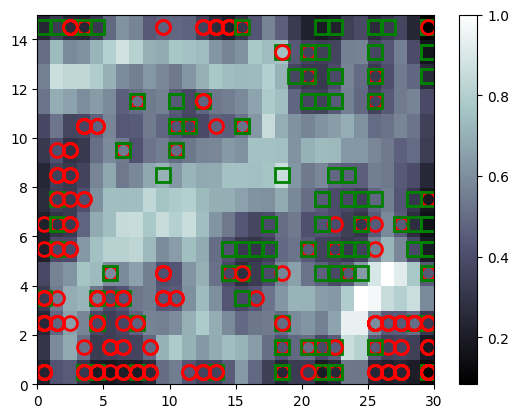

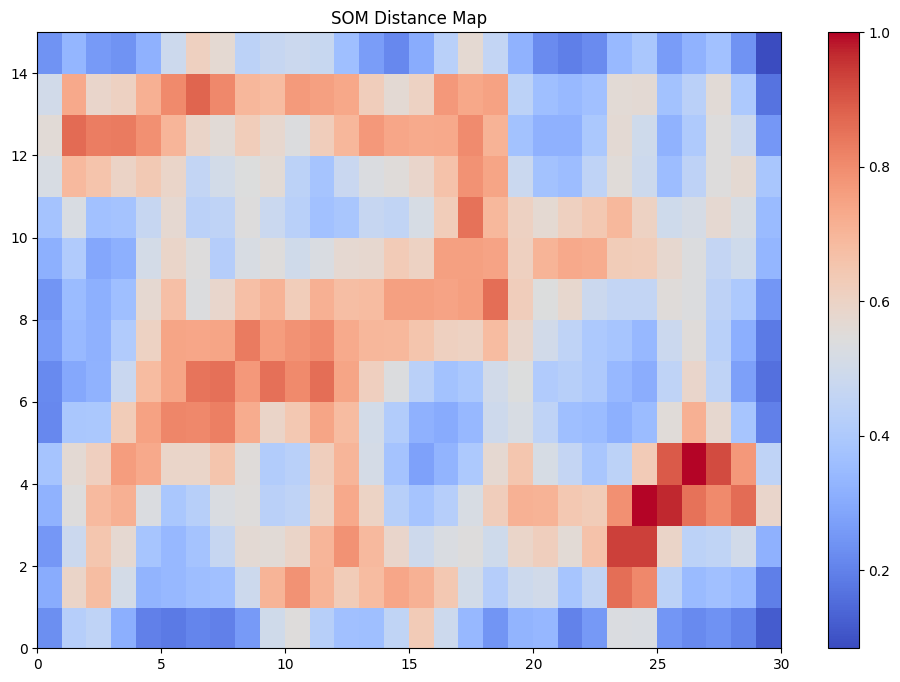

In [34]:
from pylab import bone, pcolor, colorbar, plot, show

# Visualizing the SOM
bone()
pcolor(som.distance_map().T)
colorbar()

# Define markers and colors
markers = ['o', 's']
colors = ['r', 'g']

# Loop through each input data point
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

show()

# แสดงผลแผนที่ระยะห่าง (U-Matrix)
plt.figure(figsize=(12, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # ใช้สี coolwarm เพื่อเน้นเซลล์สีขาว
plt.colorbar()
plt.title('SOM Distance Map')
plt.show()

In [35]:
mappings = som.win_map(X)

# ตรวจสอบว่ามีข้อมูลในตำแหน่ง (0, 4) หรือไม่
if (0, 4) in mappings and len(mappings[(0, 4)]) > 0:
    # รวมข้อมูลในตำแหน่ง (0, 4)
    frauds = np.concatenate(mappings[(0, 4)], axis=0)  # ใช้ axis=0 หรือไม่ระบุ axis

    # ปรับให้ข้อมูลเป็นรูปแบบ 2D
    frauds = frauds.reshape(-1, X.shape[1])

    # แปลงข้อมูลกลับสู่ขนาดต้นฉบับ
    frauds = sc.inverse_transform(frauds)
    print(frauds)
else:
    print("ไม่มีข้อมูลในตำแหน่ง (0, 4) บนแผนที่ SOM")



ไม่มีข้อมูลในตำแหน่ง (0, 4) บนแผนที่ SOM


In [36]:
# สร้าง mappings ของแต่ละเซลล์ใน SOM
mappings = som.win_map(X)
outliers = []

# ตรวจจับ Outliers โดยหาค่าที่มีจำนวนข้อมูลเพียง 1 ค่าในเซลล์นั้น
for coord, values in mappings.items():
    if len(values) == 1:  # เซลล์ที่มีค่าเดียวถือว่าเป็น Outlier
        outliers.append(values[0])

# แปลง outliers จาก numpy array กลับเป็น DataFrame เพื่อตรวจสอบ CustomerID
outlier_indices = [i for i, x in enumerate(X) if any(np.all(x == outlier) for outlier in outliers)]  # Remove axis=1
outlier_ids = dataset.iloc[outlier_indices, 0].values  # ดึง CustomerID จาก index ที่เป็น outliers

# แสดงผล CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข
print("CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:")
print(outlier_ids)

# สรุปจำนวน Outliers
num_outliers = len(outlier_ids)
print(f"จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: {num_outliers} คน")


CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:
[15571121 15638610 15610042 15617348 15731586 15649160 15572390 15603683
 15694666 15598802 15632789 15592914 15596165 15800773 15799785 15663194
 15795527 15670646 15666012 15593834 15569682 15586174 15717065 15605341
 15748649 15711299 15642098 15700046 15674583 15588854 15594651]
จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: 31 คน


In [18]:
import matplotlib.pyplot as plt
# ตรวจสอบตำแหน่งที่มีข้อมูลใน SOM
mappings = som.win_map(X)

# ตรวจสอบว่าข้อมูลในเซลล์ใดมีลักษณะผิดปกติ
for position, values in mappings.items():
    if len(values) == 1:  # ถ้าเซลล์นี้มีข้อมูลเพียงค่าเดียว (ถือว่าเป็น outlier)
        print(f"ตำแหน่ง {position}")
        print(f"มีข้อมูลผิดปกติ: {values}")


ตำแหน่ง (18, 6)
มีข้อมูลผิดปกติ: [array([1.77504415e-01, 0.00000000e+00, 1.00300752e-01, 3.75000000e-01,
       0.00000000e+00, 1.00000000e+00, 8.75000000e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 7.70000000e-02, 3.20000000e-04])]
ตำแหน่ง (7, 12)
มีข้อมูลผิดปกติ: [array([0.44607555, 1.        , 0.21052632, 0.02089286, 0.        ,
       0.92307692, 0.375     , 0.00877193, 1.        , 1.        ,
       0.02985075, 0.        , 0.5       , 0.13      , 0.005     ])]
ตำแหน่ง (14, 3)
มีข้อมูลผิดปกติ: [array([0.0989873 , 0.        , 0.16917293, 0.03125   , 0.5       ,
       1.        , 0.875     , 0.03649123, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.08      , 0.0586    ])]
ตำแหน่ง (27, 14)
มีข้อมูลผิดปกติ: [array([0.15204081, 1.        , 0.10406015, 0.02982143, 0.        ,
       0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.12      